In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('AEP_hourly.csv')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [4]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [5]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [6]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index=pd.to_datetime(dataset.index)
dataset.head()

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [7]:
df

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday
...,...,...,...,...,...,...,...,...
121268,2018-01-01 20:00:00,21089.0,1,2018,2018-01-01,20:00:00,1,Monday
121269,2018-01-01 21:00:00,20999.0,1,2018,2018-01-01,21:00:00,1,Monday
121270,2018-01-01 22:00:00,20820.0,1,2018,2018-01-01,22:00:00,1,Monday
121271,2018-01-01 23:00:00,20415.0,1,2018,2018-01-01,23:00:00,1,Monday


In [8]:
print(df.Year.unique(), "\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



No handles with labels found to put in legend.


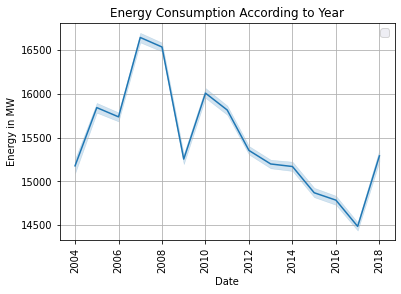

In [9]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy Consumption According to Year")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
  label.set_rotation(90)



No handles with labels found to put in legend.


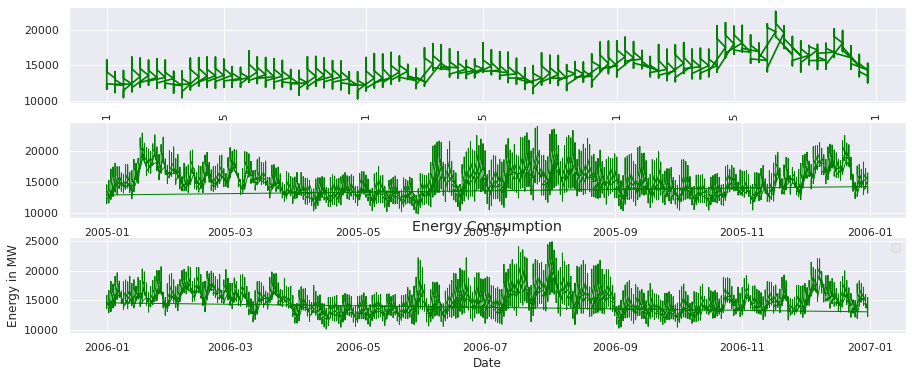

In [10]:
from matplotlib import style
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

x_2004 = dataset['2004']['Date'].to_list()
y_2004 = dataset['2004']['AEP_MW'].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth = 1.7)

x_2005 = dataset['2005']['Date'].to_list()
y_2005 = dataset['2005']['AEP_MW'].to_list()
ax2.plot(x_2005,y_2005, color="green", linewidth = 1)

x_2006 = dataset['2006']['Date'].to_list()
y_2006 = dataset['2006']['AEP_MW'].to_list()
ax3.plot(x_2006,y_2006, color="green", linewidth = 1)

plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
  label.set_rotation(90)

Text(0.5, 1.0, 'Energy Distribution')

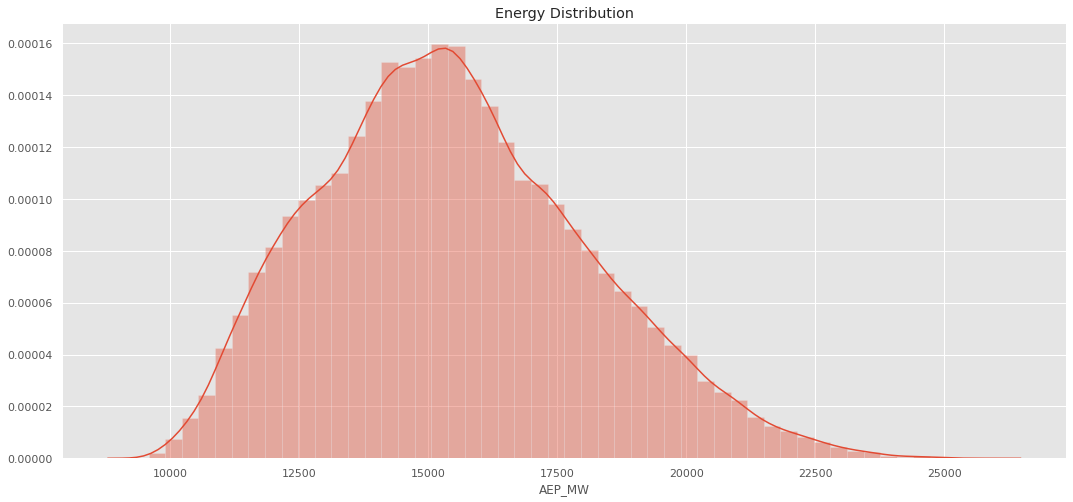

In [11]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

No handles with labels found to put in legend.


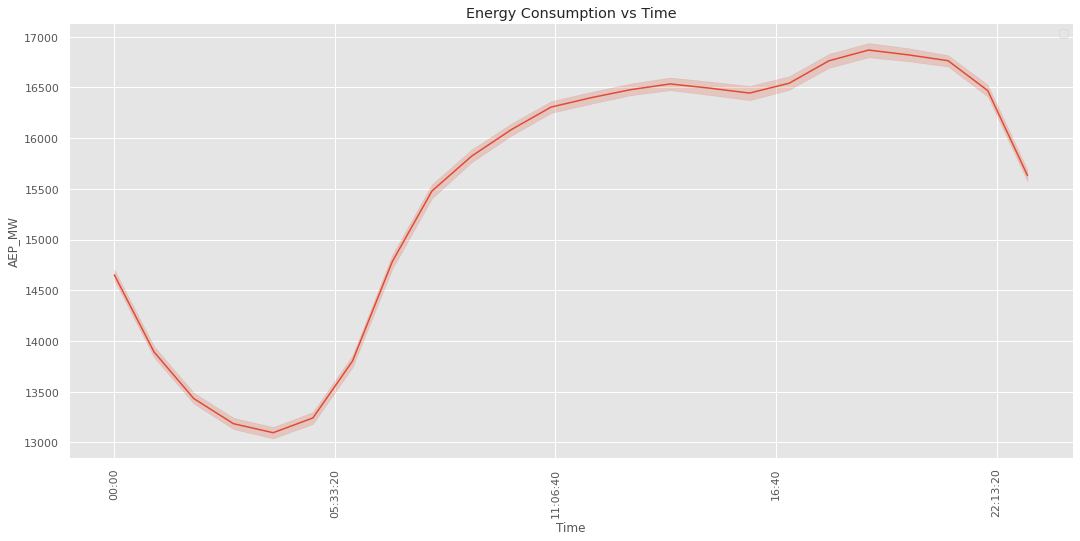

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

pd.plotting.register_matplotlib_converters()

sns.lineplot(x=dataset["Time"],y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time")
plt.xlabel('Time')
plt.grid(True, alpha=1)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
  label.set_rotation(90)

### Resampling Data

In [0]:
NewDataSet = dataset.resample('D').mean()

In [14]:
print("Old Dataset",dataset.shape)
print("New Dataset",NewDataSet.shape)

Old Dataset (121273, 7)
New Dataset (5055, 4)


In [0]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [16]:
print("Traing Set Shape", Training_Set.shape)
print("Testing Set Shape", TestData.shape)

Traing Set Shape (4995, 1)
Testing Set Shape (100, 4)


In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
Train = sc.fit_transform(Training_Set)
Train

array([[0.27243207],
       [0.16328467],
       [0.09762599],
       ...,
       [0.26628457],
       [0.23335788],
       [0.25909104]])

In [19]:
X_Train = []
Y_Train = []

for i in range(60, Train.shape[0]):
  X_Train.append(Train[i-60:i])
  Y_Train.append(Train[i])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [20]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_Train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 128)

Epoch 1/50
39/39 [==============================] - 2s 58ms/step - loss: 0.0296
Epoch 2/50
39/39 [==============================] - 2s 57ms/step - loss: 0.0202
Epoch 3/50
39/39 [==============================] - 2s 56ms/step - loss: 0.0194
Epoch 4/50
39/39 [==============================] - 2s 57ms/step - loss: 0.0186
Epoch 5/50
39/39 [==============================] - 2s 56ms/step - loss: 0.0183
Epoch 6/50
39/39 [==============================] - 2s 57ms/step - loss: 0.0179
Epoch 7/50
39/39 [==============================] - 2s 60ms/step - loss: 0.0177
Epoch 8/50
39/39 [==============================] - 2s 58ms/step - loss: 0.0175
Epoch 9/50
39/39 [==============================] - 2s 58ms/step - loss: 0.0174
Epoch 10/50
39/39 [==============================] - 2s 57ms/step - loss: 0.0169
Epoch 11/50
39/39 [==============================] - 2s 56ms/step - loss: 0.0164
Epoch 12/50
39/39 [==============================] - 2s 57ms/step - loss: 0.0159
Epoch 13/50
39/39 [==================

In [24]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17


In [25]:
TestData.shape

(100, 4)

In [26]:
NewDataSet.shape

(5055, 4)

In [0]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis = 0)

In [29]:
Df_Total.shape

(5155, 1)

In [30]:
inputs = Df_Total[len(Df_Total)-len(TestData)-60:].values
inputs.shape

(160, 1)

In [0]:
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []
for i in range(60,160):
  X_test.append(inputs[i-60:i])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
True_MegaWatt = TestData["AEP_MW"].to_list()
predicted_MegaWatt = predicted_stock_price
dates = TestData.index.to_list()

In [0]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMegaWatt":[x[0] for x in predicted_MegaWatt]
})

In [36]:
Machine_Df

,Date,TrueMegaWatt,PredictedMegaWatt
0,2018-04-26,13157.791667,14624.834961
1,2018-04-27,12964.000000,13646.509766
2,2018-04-28,12237.583333,14170.684570
3,2018-04-29,12156.791667,13373.875977
4,2018-04-30,13443.500000,13559.917969
...,...,...,...
95,2018-07-30,15368.083333,14939.403320
96,2018-07-31,15180.291667,16254.076172
97,2018-08-01,15151.166667,15446.277344
98,2018-08-02,15687.666667,15472.270508


In [0]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in predicted_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


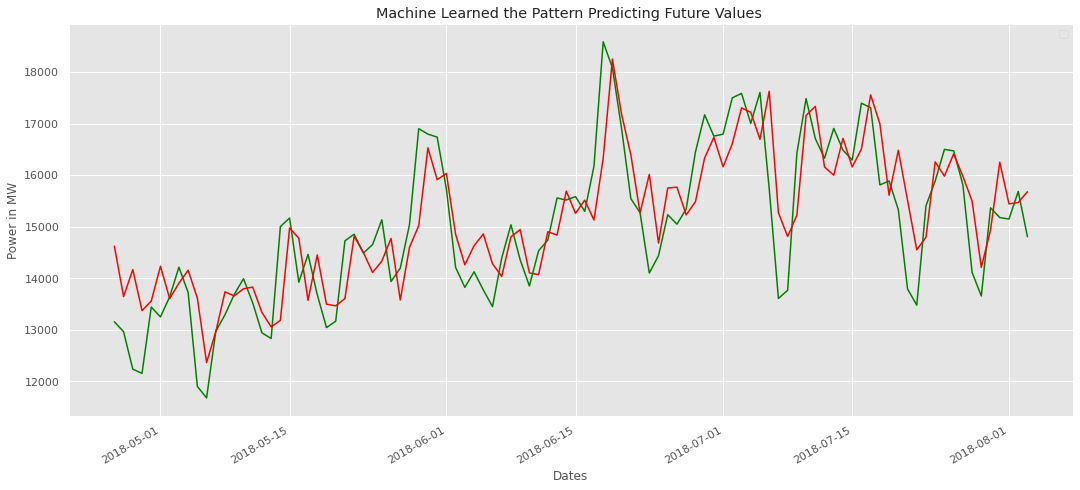

In [40]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()